# L06: Goodness-of-fit and hypothesis testing

**Sources and additional reading:**
- Lupton, chapters 4.2, 9 and 11.3
- Ivezić, chapter 4.3.1
- [Do's and don'ts of reduced $\chi^2$](https://arxiv.org/pdf/1012.3754.pdf)
- Javier R. Movellan: [Introduction to probability theory and statistics](https://inc.ucsd.edu/mplab/75/media/ProbabilityAndStats.pdf)
- KS test illustration: https://www.statext.com/practice/KolmogorovSmirnovT04.php

## The $\chi^2$ distribution

The $\chi^2$ distribution is a central distribution in statistics. Let $(x_1, ..., x_n)$ be an iid sample of $n$ draws from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$. Then we can define the rescaled variables $z_i=\frac{x_i-\mu}{\sigma}$, which are still Gaussian but have mean zero and standard deviation one. The sum of the squares of the $z_i$ defined as $$X^2=\sum_{i=1}^n z_i^2,$$ then follows a $\chi^2$ distribution with $k=n$ degrees-of-freedom as defined as $$P(X|k) := \chi^2(X|k)=\frac{1}{2^{k/2}\Gamma(k/2)}X^{k/2-1}e^{-X/2},$$ where $\Gamma$ denotes the gamma function. This distribution is characterized by the parameter $k$. The expectation value of the $\chi^2$ distribution is given by $k$, while its variance is $2k$. Therefore the distribution of $X$ only depends on the number of Gaussian variables (i.e. the sample size) but does not depend on the mean $\mu$ or the standard deviation $\sigma$ of the sample.

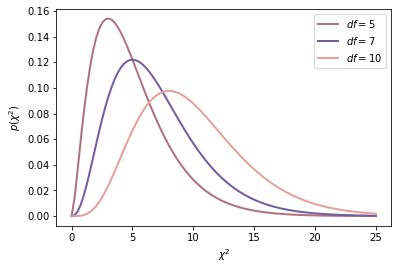

In [9]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

df1 = 5
df2 = 7
df3 = 10

x = np.linspace(0, 25, 100)

plt.plot(x, scipy.stats.chi2.pdf(x, df1), c='#AE7182', linewidth=2, label=r'$df={}$'.format(df1))
plt.plot(x, scipy.stats.chi2.pdf(x, df2), c='#725e9c', linewidth=2, label=r'$df={}$'.format(df2))
plt.plot(x, scipy.stats.chi2.pdf(x, df3), c='#e3a19c', linewidth=2, label=r'$df={}$'.format(df3))
plt.xlabel(r'$\chi^2$')
plt.ylabel(r'$p(\chi^2)$')
plt.legend()

## The $\chi^2$ as a measure for goodness-of-fit

So far, we have looked at three different (but connected) methods to estimate model parameters: point processes, MLE, LLS. In the latter two cases, we have used the likelihood and the mean squared deviation between model and data, and we minimized those quantities to obtain estimators for the model parameters. Nowhere so far have we formally checked that these parameters actually provide a good fit to the data. 

This is not easy in general, but if our model predicts that the data are Gaussian, we get insights using the value of the likelihood (or the corresponding $\chi^2$) as a measure for goodness-of-fit. The main idea is that  having derived the best-fit parameters, we can compute the corresponding value of the likelihood and ask how likely such a value would be if the model were true. If the probability to obtain this value under the null hypothesis is large, we can conclude that the model is a good fit to the data, if on the other hand it is unlikely to obtain such a value if the data are randomly drawn from the model, then the model is not a good description of the data. So we see that in order to answer the question about goodness-of-fit we need to know the distribution of the likelihood itself.

Let us go back to our favorite experiment in which we have measured an iid sample of size $n$, $(x_1, ..., x_n)$. Our model is that these measurements are drawn from a Gaussian distribution $\mathcal{N}(\mu, \sigma)$ with mean $\mu$ and known standard deviation $\sigma$. The likelihood for this observation is given by $$P(x_1, ..., x_n|\mu, \sigma) = \frac{1}{\left(\sqrt{2\pi}\sigma \right)^n}\prod_i e^{-(x_i-\mu)^2/(2\sigma^2)}.$$ Taking the logarithm, we get $$\log P(x_1, ..., x_n|\mu, \sigma) = -\frac{n}{2}\log{2\pi}-n\log{\sigma}-\sum_i \frac{(x_i-\mu)^2}{2\sigma^2}.$$ 

If $\sigma$ is assumed known, we can generically rewrite this as $$\log P = \mathrm{const.}-\frac{1}{2}\sum_i z_i^2 = \mathrm{const.}-\frac{1}{2}\chi^2,$$ where we have defined $z_i=\frac{x_i-\mu}{\sigma}$. Under our hypothesis of Gaussianity of the $x_i$, $z_i$ is a Gaussian random variable with mean $0$ and variance $1$, i.e. $z_i\sim \mathcal{N}(0, 1)$. Therefore the $\chi^2$ defined through $$\chi^2=\sum_i z_i^2,$$ is the sum of $n$ squares of Gaussian random variables. 

If we have not used the data to fit any model parameters, the number of degrees-of-freedom $dof$ in the $\chi^2$ variable is $dof=n$. If on the other hand, we have used the data to fit a number of $r$ model parameters, the effective number of degrees-of-freedom will generally be reduced as some Gaussian variables will be fixed. For linear models and $r$ linearly independent parameters, the effective number of degrees-of-freedom will be reduced to $dof=n-r$. For more complicated models however, the number of degrees-of-freedom is difficult to estimate analytically and can range anywhere from $n$ to 0.

Nevertheless, knowing these limitations it is always useful to test the consistency of the observed $\chi^2$ value with a $\chi^2$ distribution, or equivalently test if the reduced $\chi^2$, $\chi^2_{\mathrm{red}}=\frac{\chi^2}{dof}$, is consistent with 1 within its uncertainties. 

As a side note: we have derived all this assuming uncorrelated Gaussian random variables. Everything we have discussed also applies to correlated Gaussian random variables, as in this case $\chi^2=(\boldsymbol{x}-\boldsymbol{\mu})^TC^{-1}(\boldsymbol{x}-\boldsymbol{\mu})$. The covariance matrix is symmetric and thus diagonalizable, so we can always transform to a coordinate system where $\chi^2$ is the sum of uncorrelated Gaussian random variables.

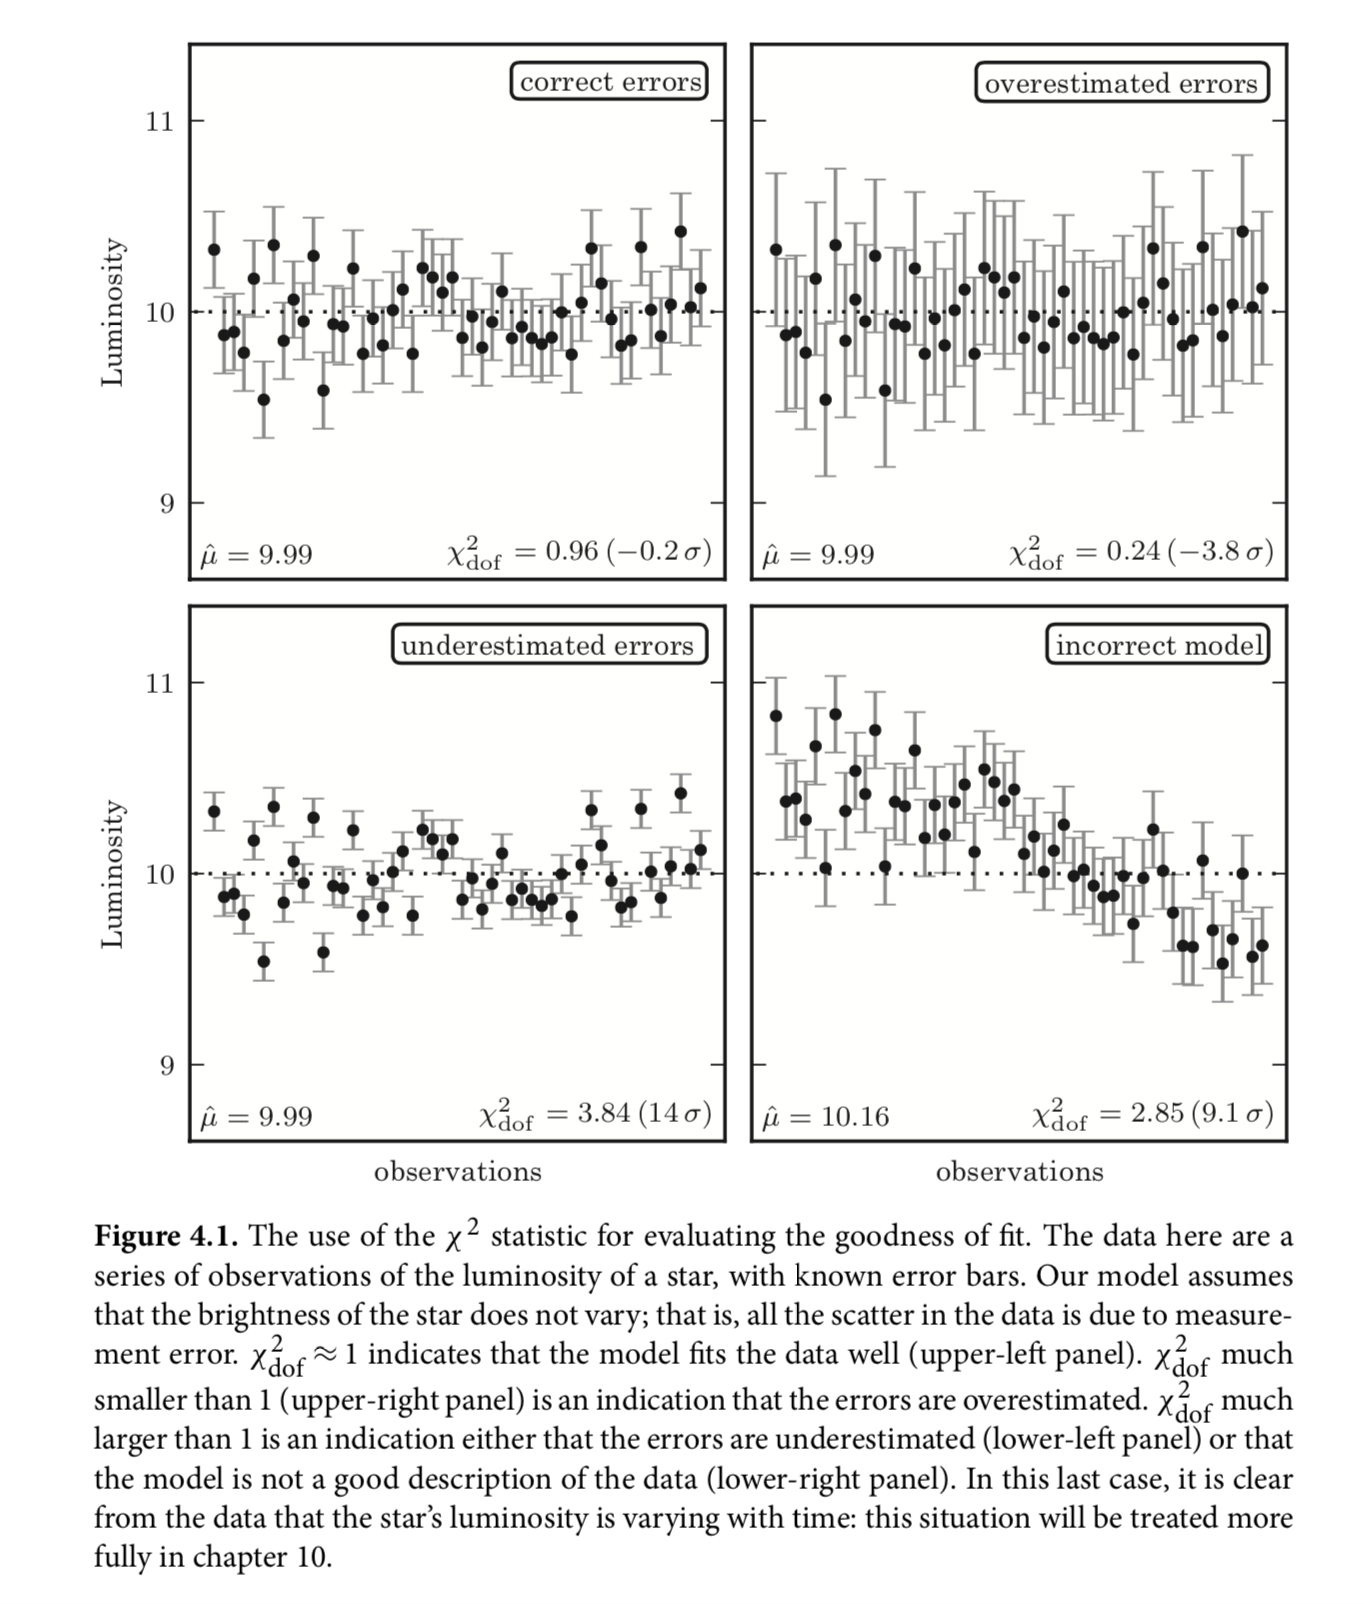

## Hypothesis testing

### Introduction

Often in physics, we use or collect data to test a given hypothesis. For example, let us assume we have a model that tells us that the mean of a given distribution is $\mu_0$, which we call our null hypothesis $H_0$. We then go and collect data in order to test this hypothesis, i.e. the question we are trying to answer is: Are the data we have collected consistent with our null hypothesis $H_0$?

To formalize this, we define two hypotheses prior to collecting our data:

$H_0$: null hypothesis, e.g. for a generic parameter $\theta$, $\theta=\theta_0$,

$H_1$: alternative hypothesis, e.g. $\theta \neq \theta_0$.

After data collection we then 

1. Assess how likely the data is given the null hypothesis.

2. Reject the null hypothesis if there is enough evidence for doing so. Otherwise, we do not reject the null hypothesis.

So the main idea of hypothesis testing is to compute the probability of the observed results under the null hypothesis and reject it if this probability is very small. This implies some sort of threshold to decide between accepting and rejecting the null hypothesis.

### Type I vs. type II errors

When deciding between two competing hypotheses, there are two types of errors we can make:

**Type I error:** We reject the null hypothesis $H_0$ when it is actually true. This is also called a *false positive*.

**Type II error:** We fail to reject the null hypothesis $H_0$ when the alternative $H_1$ is true. This is also called a *false negative*.

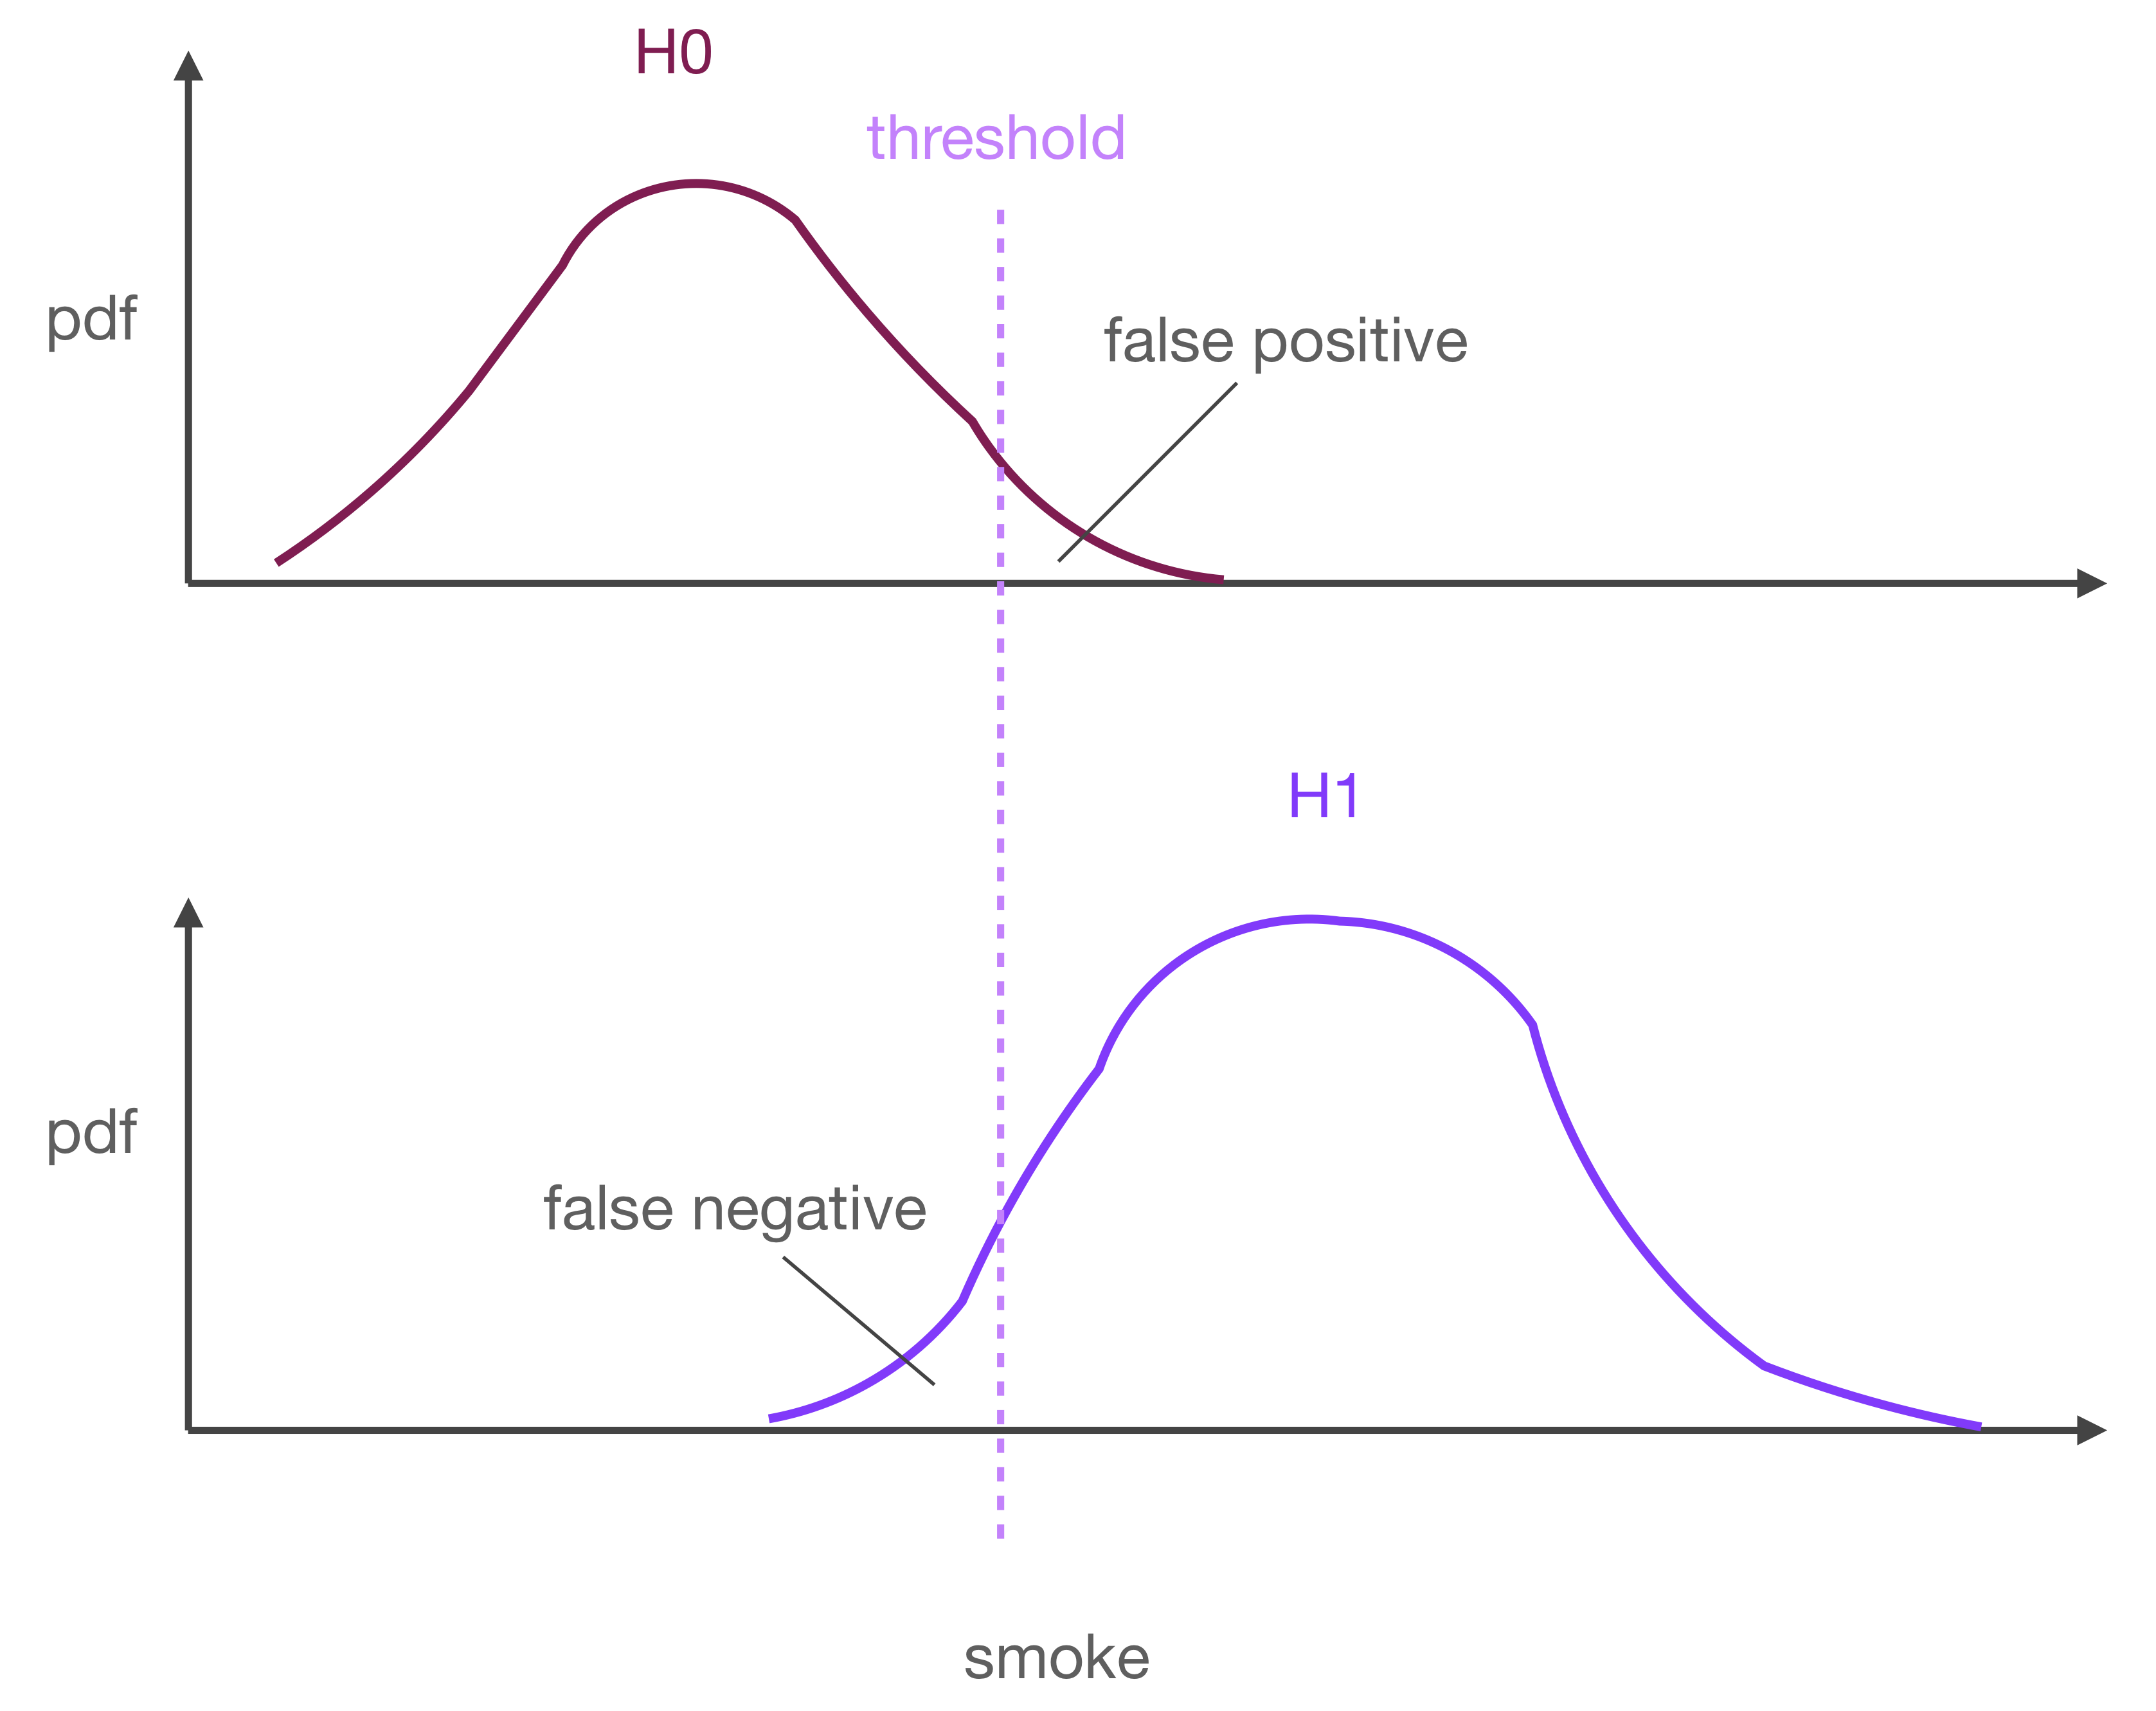

### $p$-value and significance of a test

To be able to reject (or not) a null hypothesis, we need to define a threshold. Let us assume that we have collected data $x_i$ that under the null hypothesis is characterized by a pdf $h_0(x)$. We can define the $p$-value of the data as $$p = \int_{x_i}^\infty \mathrm{d}x \; h_0(x) = 1 - \int_\infty^{x_i} \mathrm{d}x \; h_0(x) = 1 - H_0(x),$$ where $H_0(x)$ is the cdf of $h_0(x)$.

Typically, we pick a threshold $p$-value, which is called the *significance* $\alpha$. We then reject the null hypothesis if the $p$ value of observation $x_i$ gives $p_i\leq \alpha$. This choice keeps type I errors under control at the $100\alpha \%$-level, while it does not specify anything about type II errors.

It is important to note:

1. If we can't reject the null hypothesis, it doesn't mean that $H_0$ is true. It might be that our sample is not large enough to detect an effect.

2. If we do reject the null hypothesis, this does not mean that $H_1$ is true. But it might be that our null hypothesis is wrong or there are other effects we have not considered.

A common threshold is $\alpha=0.05$ which means that the null hypothesis is rejected in less than $5\%$ of the cases if it is true. Sometimes, thresholds are defined as $n\sigma$. For a Gaussian distribution for example, $5\sigma$ would correspond to $\alpha=3\times10^{-7}$.

## Examples of statistical tests

The basic idea of classical statistical tests is to define a test statistic which we call $T$, derive its distribution under the null hypothesis and then compute the value of the test statistic for the observed data $T_{\mathrm{obs}}$. If the $p$-value of $T_{\mathrm{obs}}$ satisfies $p_{\mathrm{obs}}\leq\alpha$, then we reject the null hypothesis with significance $\alpha$, otherwise we cannot reject it.

### The Z-test

Let us assume that we observe a sample of $n$ random variables $(x_1, ..., x_n)$. We assume the following:
1. The random variables are iids.
2. If $n\lesssim 30$, the variables are Gaussian.

Our null hypothesis specifies that this sample is drawn from a distribution with mean $\mu_0$ and standard deviation $\sigma$. 

In order to test this hypothesis, we need to test if the sample mean $\hat{\mu}$ is consistent with $\mu_0$. In order to test the null hypothesis, we can define the so-called $Z$-statistic as $$Z=\frac{\hat{\mu}-\mu_0}{\sigma/\sqrt{n}}.$$ Under the null hypothesis and following our assumptions, $\hat{\mu}-\mu_0$ is distributed as a Gaussian random variable with mean 0 and standard deviation $\sigma/\sqrt{n}$. Therefore $Z$ follows a $\mathcal{N}(0, 1)$ distribution. At a two-tailed significance $\alpha=0.05$, we thus reject the null hypothesis if $|Z|\geq 1.96$.

### The T-test

Often we are in the situation in which we would like to test the consistency of an observed sample mean with a mean $\mu_0$ but unknown variance (e.g. we need to use the data to estimate our experimental uncertainties). From a sample $(x_1, ..., x_n)$ of $n$ iids, we can calculate the sample mean $\hat{\mu}$ as well as the sample variance $\hat{\sigma}^2=\frac{1}{n-1}\sum_i(x_i-\hat{\mu})^2$. We now make the following assumpion:

1. The random variables $x_i$ follow a Gaussian distribution.

So we can define the alternative test statistic $$T=\frac{\hat{\mu}-\mu_0}{\hat{\sigma}/\sqrt{n}}.$$ In order to use it we need to know its distribution. 
Let $\sigma$ be the true (unknown) standard deviation of $\mu_0$. Then we can write that $$T=\frac{\sigma/\sqrt{n} Z}{\hat{\sigma}/\sqrt{n}}.$$ If the random variables $x_i$ are Gausian, we know that $Z$ follows a standard normal distribution, and it can be shown that $\frac{(n-1)\hat{\sigma}^2}{\sigma^2}$ follows a $\chi^2$-distribution with $n-1$ degrees-of-freedom. Therefore $T$ is the ratio of a standard normal and the square root of a scaled $\chi^2$-variable, which are independent in the case of Gaussian $x_i$. The resulting distribution is called *Student's $t$-distribution*. So in analogy to the $Z$ statistic, we can compute the value of the $T$ statistic for a given observation and null hypothesis and then determine the consistency based on the $t$-distribution.

Procedure to perform a $t$-test:

1. Find $\mu_0$.
2. Compute the value of $T$.
3. Compute the number of degrees-of-freedom for the distribution of $\hat{\sigma}^2$.
4. For the $t$-distribution you need in your case, compute $c$ such that $$P(T>c|H_0)=0.025$$.
4. If $T\notin [-c, c]$ reject the null hypothesis, otherwise withhold judgement (accept the null hypothesis).

### The Kolmogorov-Smirnov (KS) test

The above two tests only work for Gaussian data (or large data sets) and essentailly only allow to test the consistency of the sample mean with a null hypothesis. So how can we compare two arbitrary pdfs and check if they are consistent or not? A common test to compare two one-dimensional pdfs is the so-called KS test. It can be applied to both analytical and sampled pdf. For simplicity, here we will only consider the case in which we compare an observed sample from a given pdf to its underlying analytical expectation. To formalize this, let us assume, we observe an iid sample of $n$ random variables $(x_i, ..., x_n)$. We would like to test the consistency of this sample with a pdf $f(x)$. In order to identify a suitable test statistic, we need to consider the associated cdf $F(x)$. For our sample, we can define the *empirical cumulative distribution function as* $$F_n(x) =P_n(X\leq x) = \frac{1}{n}\sum_{i=1}^n I(x_i\leq x),$$ where $$I(x_i\leq x)=\begin{cases}
1, x_i\leq x\\
0, \mathrm{otherwise}
\end{cases}.$$ We can now define our null hypothesis (and alternative):

$H_0$: The sample $(x_i, ..., x_n)$ is drawn from $F(x)$.

$H_1$: The sample $(x_i, ..., x_n)$ is not drawn from $F(x)$.

Under the null hypothesis, we have that $$\sup_{x\in \mathbb{R}} |F_n(x)-F(x)| \to 0, \;\mathrm{for}\; n\to \infty.$$ The KS test is built on the fact that the distribution of $\sup_{x\in \mathbb{R}} |F_n(x)-F(x)|$ is independent of $F$ under the null hypothesis, and we can thus define the KS statistic $$D_n :=\sqrt{n}\sup_{x\in \mathbb{R}} |F_n(x)-F(x)|.$$ The distribution of this quantity only depends on $n$ and is called a Kolmogorov distribution.

The procedure for conduction a KS test is thus:

1. Compute $D_n$.
2. Determine $c$ such that $P(D_n>c|H_0)=\alpha$.
3. If $D_n\leq c$ accept the null hypothesis, otherwise reject it.

Below you can see an illustration of the KS test in action, where it is used to compare the distribution of household expenses of men and women in Hong Kong. The plot shows the two cdfs obtained from the data, and the corresponding $D_n$.

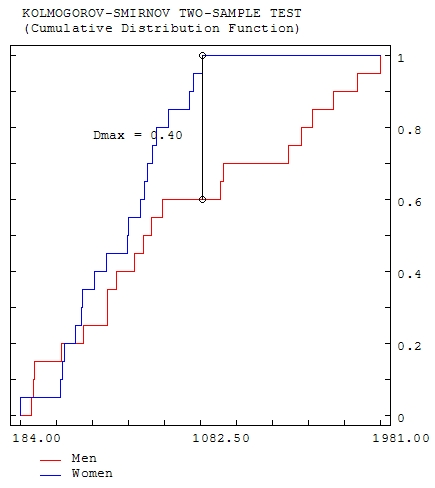